# Homework set 1

# Exercise 0

- Amir Sahrani (12661651)
- Jonas Schäfer (14039982)

#### Importing packages

In [98]:
import numpy as np
from math import factorial, tan
import sympy
import matplotlib.pyplot as plt
import sys

In [99]:
COLORS_BY_KEY = {'black': '#2B303A', 'green': '#0C7C59',
                 'blue': '#58A4B0', 'pink': '#9C7A97', 'red': '#D64933'}
COLORS = list(COLORS_BY_KEY.values())
%mkdir -p media/final/hw1
SAVE_DIR = 'media/final/hw1'

-----
# Exercise 1

## (a)
Write a program to compute an approximate value for the derivative of a function using the finite difference formula 
$$f'(x) \approx \frac{f(x+h) - f(x)}{h} .$$
Test your program using the function $\tan(x)$ for $x=1$. Determine the error by comparing with the analytical derivative of $\tan(x)$. Plot the magnitude of the error as a function of $h$, for $h = 10^{-k}$, $k=0,1,2, \ldots, 16$ using an appropriate type of plot. Is there a minimum value for the magnitude of the error? How does the corresponding value for $h$ compare with the rule of thumb $h \approx \sqrt{\epsilon_{\rm mach}}$ derived in Heath example 1.3?

epsilon_mach = 2.220446049250313e-16
h_min = 1e-08 (at index 8)


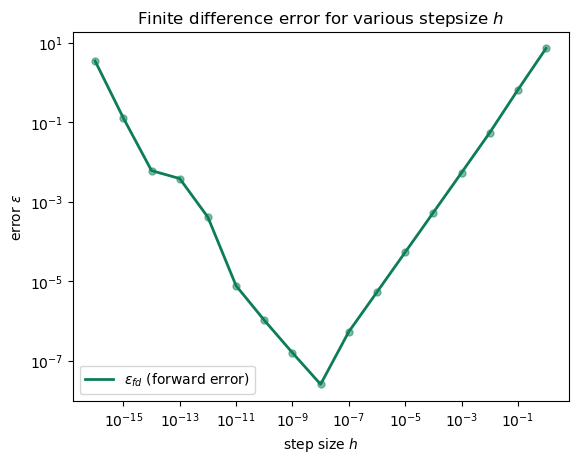

In [100]:
def approx_f_prime_fd(f, x, h):
    return (f(x+h)-f(x))/h


X = sympy.symbols('x')
f = sympy.diff(sympy.tan(X), X)
solution = f.subs(X, 1).evalf(n=30)

e_mach = sys.float_info.epsilon
print(f'epsilon_mach = {e_mach}')

errors_fd = []
hs = [10**-k for k in range(0, 17)]
errors_mach = [np.sqrt(e_mach)]*len(hs)

for h in hs:
    finite_difference = approx_f_prime_fd(tan, 1, h)
    errors_fd.append(abs(float(finite_difference-solution)))

idx_h_min = errors_fd.index(min(errors_fd))
print(f'h_min = {hs[idx_h_min]} (at index {idx_h_min})')
plt.loglog(hs, errors_fd, c=COLORS[1], linewidth=2)
plt.scatter(hs, errors_fd, c=COLORS[1], s=25, alpha=0.5)
plt.legend(['$\\epsilon_{{fd}}$ (forward error)'])
plt.title('Finite difference error for various stepsize $h$')
plt.xlabel('step size $h$')
plt.ylabel('error $\\epsilon$')
plt.savefig(f'{SAVE_DIR}/fd_error.png', dpi=300)
plt.show()

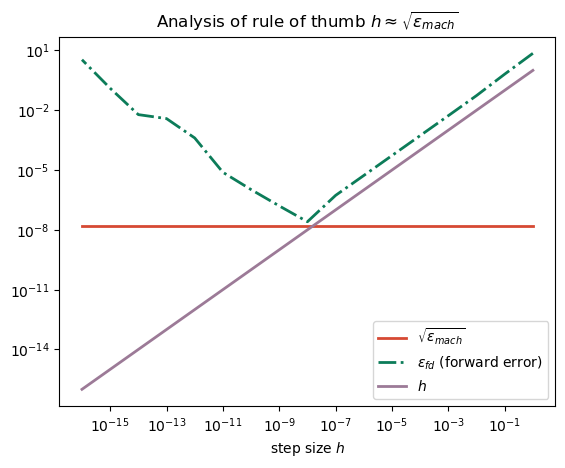

In [101]:
plt.loglog(hs, errors_mach, c=COLORS[4], linewidth=2)
plt.loglog(hs, errors_fd, c=COLORS[1], linewidth=2, linestyle='-.')
plt.loglog(hs, hs, c=COLORS[3], linewidth=2)
plt.legend(['$\\sqrt{\\epsilon_{mach}}$', '$\\epsilon_{fd}$ (forward error)', '$h$'])
plt.title('Analysis of rule of thumb $h \\approx \\sqrt{\\epsilon_{mach}}$')
plt.xlabel('step size $h$')
plt.savefig(f'{SAVE_DIR}/fd_analysis.png', dpi=300)
plt.show()

We can see here that $h \approx \sqrt{\epsilon_{mach}}$ holds near $h_{min}$ which is the value of h at which we observe the minimum error:

$$h_{min} \approx 10^{-8}$$
$$\sqrt{\epsilon_{mach}} \approx \sqrt{10^{-16}} = 10^{-8}$$

Therefore, this rule of thumb is effective in determining a parameterisation for this approximation.

## (b)
Repeat the exercise using the centered difference approximation
$$ f'(x) \approx \frac{f(x+h) - f(x-h)}{2h} .$$

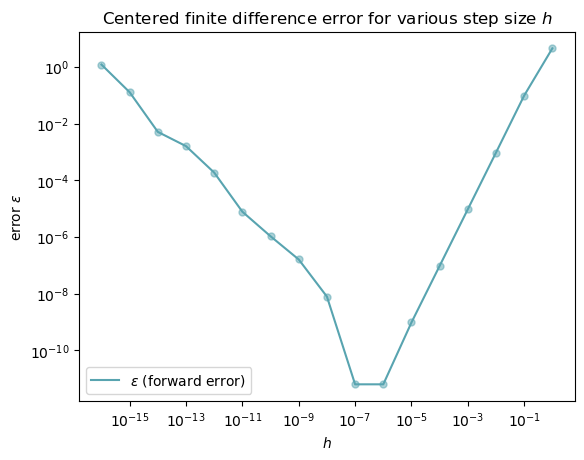

In [102]:
def approx_f_prime_center(f, x, h):
    return (f(x+h)-f(x-h))/(2*h)

errors_center = []
for h in hs:
    finite_difference = approx_f_prime_center(tan, 1, h)
    errors_center.append(abs(finite_difference-solution))

plt.loglog(hs, errors_center, c=COLORS[2])
plt.scatter(hs, errors_center, c=COLORS[2], s=25, alpha=0.5)
plt.title('Centered finite difference error for various step size $h$')
plt.legend(['$\\epsilon$ (forward error)'])
plt.xlabel('$h$')
plt.ylabel('error $\\epsilon$')
plt.savefig(f'{SAVE_DIR}/cd_error.png', dpi=300)
plt.show()

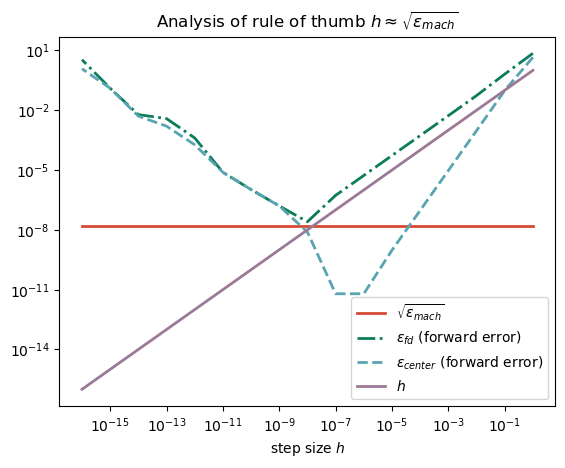

In [103]:
plt.loglog(hs, errors_mach, c=COLORS[4], linewidth=2)
plt.loglog(hs, errors_fd, c=COLORS[1], linewidth=2, linestyle='-.')
plt.loglog(hs, errors_center, c=COLORS[2], linewidth=2, linestyle='--')
plt.loglog(hs, hs, c=COLORS[3], linewidth=2)
plt.legend(['$\\sqrt{\\epsilon_{mach}}$', '$\\epsilon_{{fd}}$ (forward error)', '$\\epsilon_{{center}}$ (forward error)', '$h$'])
plt.title('Analysis of rule of thumb $h \\approx \\sqrt{\\epsilon_{mach}}$')
plt.xlabel('step size $h$')
plt.savefig(f'{SAVE_DIR}/cd_fd_analysis.png', dpi=300)
plt.show()

With the center approximation, we observe the minimum error for $h_{min} \in [10^{-7}, 10^{-8}]$ with lower magnitude than  $\sqrt{\epsilon_{mach}}$. The approximation proposed in Heath 1.3 is suboptimal in this scenario.

-----
# Exercise 2
As you probably know, the exponential function $e^x$ is given by an infinite series
$$ \tag{*} e^x = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \ldots . $$

## (a)
Suppose you write a program to sum the series in the natural order, what stopping criterion should you use? Explain your answer.

Considering the information of each new term is decreasing, it would make sense to stop the summation once the new term is of the same order of magnitude as the machine error $\epsilon_{mach}$, latest once once we reach a term $t$ where 
$$t = \frac{x^i}{i!} \leq \epsilon_{mach}$$
The reasoning behind this stopping criterion is that we are unable to add significant precision once $\epsilon_{mach}$ is the larger value. This is due to the rounding error that manifests itself during mathematical operations of floating point numbers.

## (b)
Write a program to sum the series in the natural order, using the stopping criterion you just described.

Test your program for $$x = \pm 1, \pm 5, \pm 10, \pm 15, \pm 20 , $$ and compare your results with the built-in function $\exp(x)$. Explain any cases where the exponential function is not well approximated.

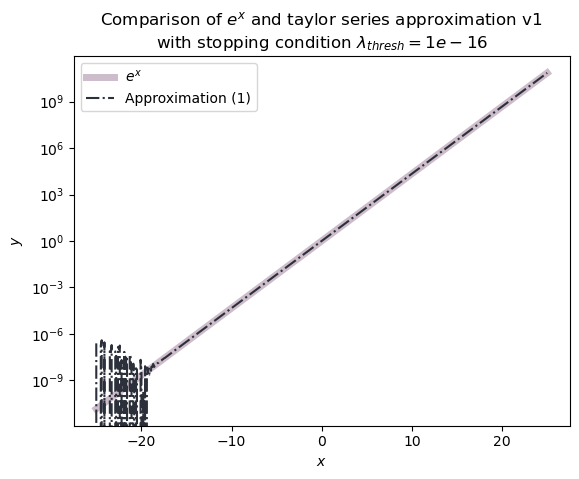

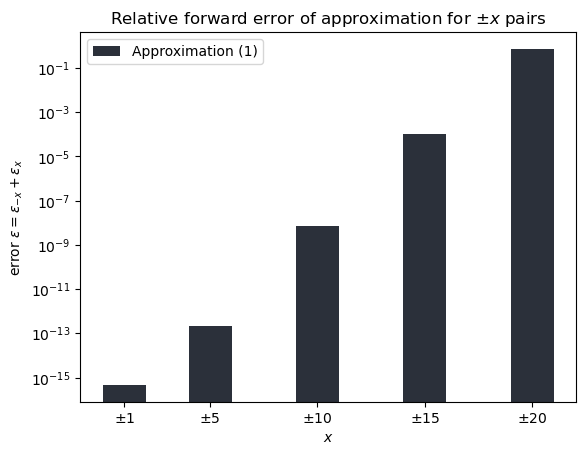

In [104]:
xs = np.linspace(-25, 25, 500)
x_values = np.array([1, 5, 10, 15, 20])
lambda_thresh = 10**-16

# Approximation (1)
def taylor_series_v1(x):
    total = 0
    i = 0
    while abs(x**i/factorial(i)) > lambda_thresh:
        total += x**i/factorial(i)
        i += 1
    return total

# Plotting whole spectrum
v_taylor_series_v1 = np.vectorize(taylor_series_v1)
y, y_hat_1 = np.exp(xs), v_taylor_series_v1(xs)


# Data for plotting only x_value pairs
true_pos, true_neg = np.exp(x_values), np.exp(-x_values)
chosen_y_hat_1_pos, chosen_y_hat_1_neg = v_taylor_series_v1(x_values), v_taylor_series_v1(-x_values)
errors_1 = np.abs(chosen_y_hat_1_pos-true_pos)/true_pos + np.abs(chosen_y_hat_1_neg-true_neg)/true_neg
errors_1_neg = np.abs(chosen_y_hat_1_neg-true_neg)/true_neg


plt.semilogy(xs, y, linewidth=5, color=COLORS[4], alpha=0.5)
plt.semilogy(xs, y_hat_1, linewidth=1.5, color=COLORS[0], linestyle='-.')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(['$e^x$', 'Approximation (1)'])
plt.title('Comparison of $e^x$ and taylor series approximation v1\n' +
          f'with stopping condition $\\lambda_{{thresh}}={lambda_thresh}$')
plt.savefig(f'{SAVE_DIR}/comparison_e_approx_1.png', dpi=300)
plt.show()


bar1 = plt.bar(x_values, errors_1, color=COLORS[0], width=2.0)
plt.xticks(x_values, ['$\\pm$' + str(x_value) for x_value in x_values])
plt.xlabel('$x$')
plt.ylabel('error $\\epsilon = \\epsilon_{-x} + \\epsilon_{x}$')
plt.yscale('log')
plt.legend(['Approximation (1)', 'Approximation (2)'])
plt.title('Relative forward error of approximation for $\\pm x$ pairs')
plt.savefig(f'{SAVE_DIR}/comparison_e_approx_1_error.png', dpi=300)
plt.show()

We can clearly observe a highly flawed approximation using the standard taylor series **Approximation (1)** proposed above, thus rapidly growing our forward error with increasing $\pm x$ pairs. Whilst approximations for $x > 0$ are near-perfect, the approximation quality decreases exponentionally for $x < 0$ as x decreases. Varying the threshold for this series does not appear to substantially influence the accuracy of our approximations for $x < 0$.

For more accurate estimates, we require a different taylor expansion than described above. These will be introduced in the following segments.

## (c)

Can you use the series in this form to obtain accurate results for $x<0$? (*Hint*: $e^{-x} = 1/e^x$.) If yes, write a second program that implements this and test it again on $x=-1, -5, -10, -15, -20$. 

Yes it is possible to utilise this method to obtain more accurate results for negative values of $x$. Below you find this test as a comparison to our previous approach.

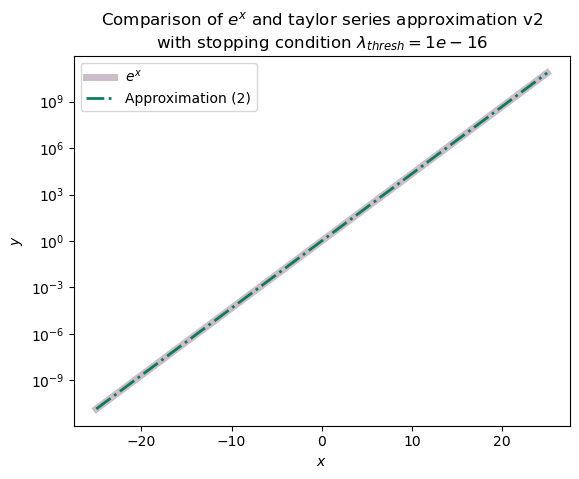

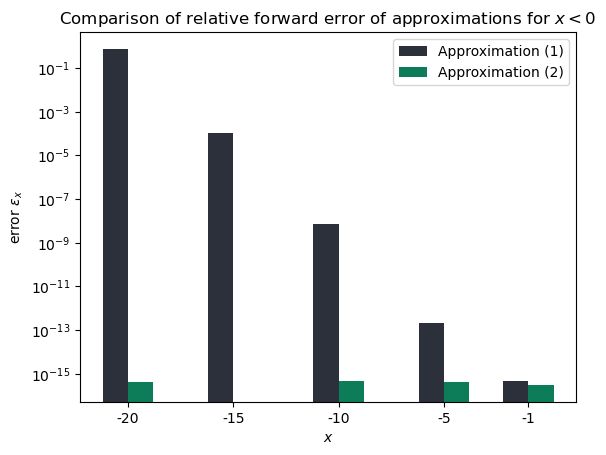

Errors of our new approximation function for negative x:  {-1: 1.508949536687701e-16, -5: 2.574557912391206e-16, -10: 1.4925713791816933e-16, -15: 0.0, -20: 2.0065962176423985e-16}


In [105]:
errors = []

# Approximation (2)
def taylor_series_v2(x):
    if x < 0:
        return 1/taylor_series_v1(-x)
    else:
        return taylor_series_v1(x)

v_taylor_series_v2 = np.vectorize(taylor_series_v2)
chosen_y_hat_2_pos, chosen_y_hat_2_neg = v_taylor_series_v2(x_values), v_taylor_series_v2(-x_values)
errors_2 = np.abs(chosen_y_hat_2_pos-true_pos)/true_pos + np.abs(chosen_y_hat_2_neg-true_neg)/true_neg
errors_2_neg = np.abs(chosen_y_hat_2_neg-true_neg)/true_neg
y_hat_2 = v_taylor_series_v2(xs)

plt.semilogy(xs, y, linewidth=5, color=COLORS[4], alpha=0.5)
plt.semilogy(xs, y_hat_2, linewidth=2, color=COLORS[1], linestyle='-.')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(['$e^x$', 'Approximation (2)'])
plt.title('Comparison of $e^x$ and taylor series approximation v2\n' +
          f'with stopping condition $\\lambda_{{thresh}}={lambda_thresh}$')
plt.savefig(f'{SAVE_DIR}/comparison_e_approx_2.png', dpi=300)
plt.show()

bar1 = plt.bar(-x_values-0.6, errors_1, color=COLORS[0], width=1.2)
bar2 = plt.bar(-x_values+0.6, errors_2, color=COLORS[1], width=1.2)
plt.xticks(-x_values, -x_values)
plt.xlabel('$x$')
plt.ylabel('error $\\epsilon_{{x}}$')
plt.yscale('log')
plt.legend(['Approximation (1)', 'Approximation (2)'])
plt.title('Comparison of relative forward error of approximations for $x < 0$')
plt.savefig(f'{SAVE_DIR}/comparison_e_approx_1_2_error.png', dpi=300)
plt.show()
print(f'Errors of our new approximation function for negative x: ', dict(zip(-x_values, errors_2_neg)))

As we can observe, our new approximation has similarly low relative error for all values $x \in \{-1, -5, -10, -20\}$ with a rounded error of 0 for $x = -15$. It rapidly outperforms our previous approximation with decreasing x; by 16 magnitudes for $x = -20$. While the relative error forward error for **Approximation (1)** grows rapidly, the error for **Approximation (2)** remains near-constant.

## (d)

Can you rearrange the series of regroup the terms of the series (\*) in any way to obtain more acccurate results for $x < 0$?

By rearranging the terms such that all the even powers and negative powers are added together seperately and added together once at the end we find a slight decrease in our error as can be seen in our comparison to the previous approach in 2c.

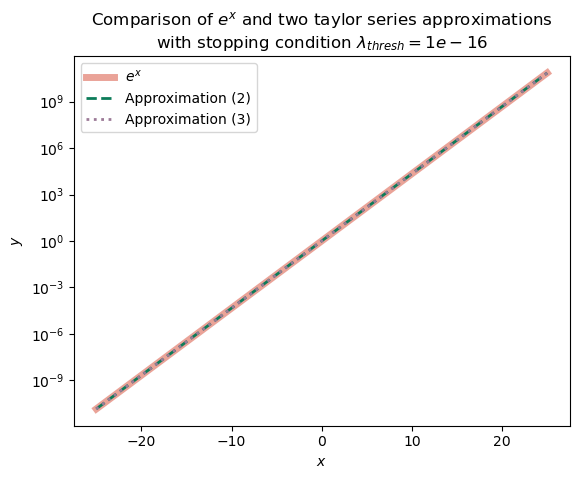

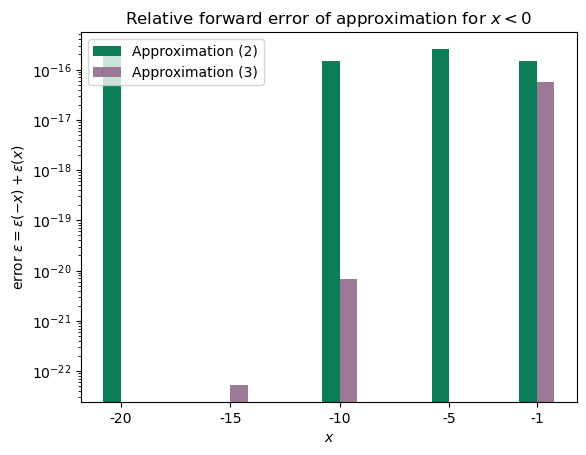

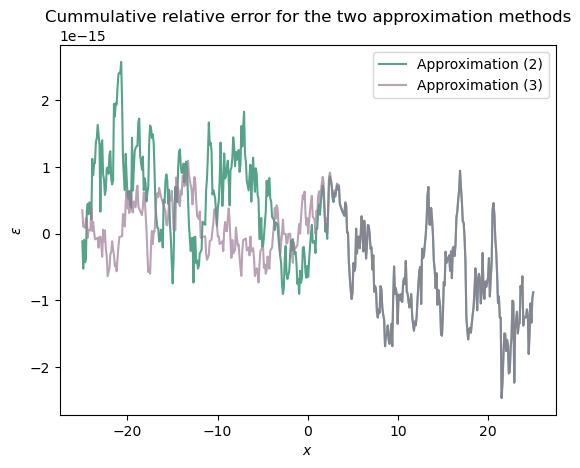

In [106]:
# Approximation (3)
def taylor_series_v3(x):
    if x < 0:
        pos = 0
        neg = 0
        i = 0
        while abs(x**i/factorial(i)) > lambda_thresh:
            if i % 2 == 0:
                pos += x**i/factorial(i)
            else:
                neg += x**i/factorial(i)
            i += 1
        total = pos - neg
        return 1/total
    else:
        return taylor_series_v1(x)

v_taylor_series_v3 = np.vectorize(taylor_series_v3)
y_hat_3 = v_taylor_series_v3(xs)
selected_y_hat_3_pos, selected_y_hat_3_neg = v_taylor_series_v3(x_values), v_taylor_series_v3(-x_values)
errors_3 = np.abs(selected_y_hat_3_pos-true_pos)/true_pos + np.abs(selected_y_hat_3_neg-true_neg)/true_neg
errors_3_neg = np.abs(selected_y_hat_3_neg-true_neg)

plt.semilogy(xs, y, linewidth=5, color=COLORS[4], alpha=0.5)
plt.semilogy(xs, y_hat_2, linewidth=2.0, color=COLORS[1], linestyle='--')
plt.semilogy(xs, y_hat_3, linewidth=2.0, color=COLORS[3], linestyle=':')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(['$e^x$', 'Approximation (2)', 'Approximation (3)'])
plt.title('Comparison of $e^x$ and two taylor series approximations\n' +
          f'with stopping condition $\\lambda_{{thresh}}={lambda_thresh}$')
plt.savefig(f'{SAVE_DIR}/comparison_e_approx_2_3.png', dpi=300)
plt.show()

# bar1 = plt.bar(-x_values-0.8, errors_1_neg, color=COLORS[0], width=0.8)
bar2 = plt.bar(-x_values-0.4, errors_2_neg, color=COLORS[1], width=0.8)
bar2 = plt.bar(-x_values+0.4, errors_3_neg, color=COLORS[3], width=0.8)
plt.xticks(-x_values, -x_values)
plt.xlabel('$x$')
plt.ylabel('error $\\epsilon = \\epsilon(-x) + \\epsilon(x)$')
plt.yscale('log')
plt.legend(['Approximation (2)', 'Approximation (3)'])
plt.title('Relative forward error of approximation for $x < 0$')
plt.savefig(f'{SAVE_DIR}/comparison_e_approx_2_3_error.png', dpi=300)
plt.show()


plt.plot(xs, np.cumsum(y_hat_2-y)/y, color=COLORS[1], alpha=0.7)
plt.plot(xs, np.cumsum(y_hat_3-y)/y, color=COLORS[3], alpha=0.7)
plt.xlabel('$x$')
plt.ylabel('$\\epsilon$')
plt.legend(['Approximation (2)', 'Approximation (3)'])
plt.title('Cummulative relative error for the two approximation methods')
plt.savefig(f'{SAVE_DIR}/comparison_e_approx_2_3_cum_error.png', dpi=300)
plt.show()
